# Using Git
### Or: how to stop worrying and love the rebase

<img src="figs/xkcdgit.png">

If that doesn't fix it, git.txt contains the phone number of a friend of mine who understands git. Just wait through a few minutes of 'It's really pretty simple, just think of branches as...' and eventually you'll learn the commands that will fix everything.

# Sander van Dijk

<center>
<img src="figs/uherts.png" style="height: 50px; margin: 50px;">

<img src="figs/bh.png" style="height: 75px; margin: 50px;">


<img src="figs/parkopedia.png" style="height: 75px; margin: 50px;">
</center>

* PhD at University of Hertfordshire, Adaptive Systems Research Group, Informational Constraints and Organisation of Behaviour
* Team leader of RoboCup team Bold Hearts
* Head of research at [Parkopedia](www.parkopedia.com)

In [1]:
# Set up initial repository
rm -fr /tmp/using-git*
mkdir -p /tmp/using-git
pushd /tmp/using-git
git init .

/tmp/using-git ~/Code/notebooks/using_git
Initialized empty Git repository in /private/tmp/using-git/.git/


In [2]:
# A helper function to generate GraphViz git logs
function gitloggraph {
    (cat << EOF
digraph git {
    graph [bgcolor="#00000000", rankdir="RL"]
    node [shape=box, color="#723A8C", fontcolor="#FFFFFF", fontsize=9, fontname="Liberation Mono", style="rounded, filled"]
EOF
    git log --all --pretty='format: { %h } -> { %p }; "%d" [color="#C8703C", style="solid", fontcolor="#000000", height=0.2] { %d } -> { %h } [color="#C8703C"];' "$@" \
        | perl -pe 's/"".+?;//g' \
        | perl -pe 's/ ([0-9a-f]+)\b/ "$1"/g' \
        | perl -pe 's/{ ([^};"]+?) }/{ "$1" }/g'
    echo '}') | dot -Tpng | display
}

## What is Git?
Git is a **Distributed Version Control System (VCS)**

- **Version Control**: Keep track of changes and version
    - I want to go back to the non-broken version!
    - Who made which changes?
- **Distributed**: No central truth
    - Everybody has complete history
    - Personal VC possible: keep track of private changes without sharing with the world
- **Team Work**: Tool for combining individual work

# The Commit

## Making History
A Git commit consists of:
- A recording of a snapshot of your files
- *Not* just your changes you made, though Git will make you believe it is
- Metadata
    - Commit message
    - Committer
    - Commit date
    - Author
    - Authoring date
- Hash of working directory
- Hashes of parent commits
- Hash of all the above

## Hashing hashed hashes...
Files, dir tree, commits  -- SHA1 -->  32 byte *signatures*.

In [3]:
echo "Bold Hearts" | git hash-object -w --stdin

7ff36f725aefcb0053476100885041eae669f38e


### To Remember: *Any difference in commit gives different hash*

## Commit Steps (theory)
Creating a commit in Git follows these steps:
1. Make changes in working directory
2. Tell Git which changes to record (*staging*)
3. Tell Git to make commit
4. Write commit message

## Commit Steps (practice)

In [4]:
# 1. Make changes
echo "Bold Hearts" > foo.txt
git status

On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	foo.txt

nothing added to commit but untracked files present (use "git add" to track)


## Commit Steps (practice)

In [5]:
# 2. Staging
git add foo.txt
git status

On branch master

Initial commit

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   foo.txt



The `git add` command 'stages' your changes for commit. It creates a snapshot of the files you specify and places these in the 'index'. When creating a commit, it is the content of this index that makes up that commit. So you must make sure to add any changed file that you want to commit. This allows you to commit only some changes at a time and group your changes logically. It is even possible to add only some parts of a file. Run `git help add` to read about all the possible options.

## Commit Steps (practice)

In [6]:
# 3. Start commit
# 4. Write commit message
git commit -m "My first commit!"

[master (root-commit) d78cb21] My first commit!
 1 file changed, 1 insertion(+)
 create mode 100644 foo.txt


The `git commit` command makes the actual commit, from the changes you added to the index. Normally it is better to not use the `-m` flag, so you get an editor to write a more detailed message, but this is obviously not possible in a notebook/slides.

In [7]:
git status

On branch master
nothing to commit, working tree clean


# Onwards

In [8]:
sed -e 's/Bold/Cold/' -i '' foo.txt
git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   foo.txt

no changes added to commit (use "git add" and/or "git commit -a")


In [9]:
git diff

diff --git a/foo.txt b/foo.txt
index 7ff36f7..e960dab 100644
--- a/foo.txt
+++ b/foo.txt
@@ -1 +1 @@
-Bold Hearts
+Cold Hearts


The `git diff` command shows the difference between your working directory and the index, i.e. the changes you have added so far. If the index is empty, they are the changes relative to the last commit. You can also get the difference between the index and the last or any other commit, between any two commits, or two local files. See `git help diff` for all the details.

# Onwards

In [10]:
git add foo.txt
git commit -m 'Cool down'

[master 3780c20] Cool down
 1 file changed, 1 insertion(+), 1 deletion(-)


In [11]:
git log

commit 3780c20648b21434154d7c8ec1203f04e4f04a03
Author: Sander van Dijk <sgvandijk@gmail.com>
Date:   Wed Oct 5 13:40:17 2016 +0100

    Cool down

commit d78cb214e32c01b570b0be2fc7c8b32cdb3d2298
Author: Sander van Dijk <sgvandijk@gmail.com>
Date:   Wed Oct 5 13:40:16 2016 +0100

    My first commit!


The `git log` command shows all commits leading up to the latest commit, with the newest at the top. Again, there are many options to determine the content and formatting of the output: `git help log`. A nice compact but rich format is `git log --all --decorate --oneline --graph`. 

# Commit contents

We can look into the internal repository objects that git creates with `git cat-file`. They are indexed by their hash, so the following gives the content of our first commits. The `-p` flag pretty-prints the contents for us humans.

In [12]:
git cat-file -p d78cb214e32c01b570b0be2fc7c8b32cdb3d2298

tree ca54a01be26f8fa167212c0ead8956969644668d
author Sander van Dijk <sgvandijk@gmail.com> 1475671216 +0100
committer Sander van Dijk <sgvandijk@gmail.com> 1475671216 +0100

My first commit!


In [13]:
git cat-file -p 3780

tree 1b14702b72f4e741cf64e553f7ead6f466204500
parent d78cb214e32c01b570b0be2fc7c8b32cdb3d2298
author Sander van Dijk <sgvandijk@gmail.com> 1475671217 +0100
committer Sander van Dijk <sgvandijk@gmail.com> 1475671217 +0100

Cool down


This is indeed all the content of a commit as listed earlier. Note that the second commit additionally specifies the first commit as its parent. Also note that we didn't have to specify the full commit hash! Any unique prefix will do, so with just two commits we could even address them by just the first character. This works for any git command.

# Lineage

## Lineage
Git's history forms a **Directed Acyclic Graph (DAG)**
- All commits point to their parent(s)
- No way to follow arrows back to start

Our graph after the 2 commits:

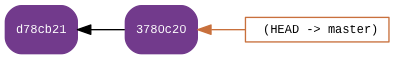

In [14]:
gitloggraph

Besides the two commits, there are also two references:
* `HEAD`: always there, indicates which commit will be the parent of your next commit, or /the commit you are 'on'/. Here, it points to `master`, which in turn points to the last commit.
* `master` is the default name of the main 'branch' of your repository.

## I was told there'd be branches...
Intuitively a branch is
- a separate line of development
- all commits from some branching point

In practice a branch is
- just a label pointing to a commit
- **not** a set of commits
- made up of all commits reachable from reference (implicitely)

Reachable here means you can get there by following the parents from the commit that the branch points to. We will look at this concept later again.

## I thought tags were labels?
- Tags label commits to make them special/easier to find
- Branch label follows new commits/`HEAD`

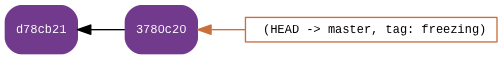

In [15]:
git tag "freezing" && gitloggraph

[master 3e29d08] Tell him again
 1 file changed, 1 insertion(+)
 create mode 100644 bar.txt


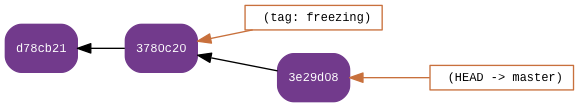

In [16]:
echo "Who told you to touch it?" > bar.txt
git add bar.txt && git commit -m "Tell him again" && gitloggraph

Note that the `master` branch reference moved to the new commit, along with `HEAD`, while the tag stayed in place. 

## Let's branch

Note: checking out 'freezing'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 3780c20... Cool down


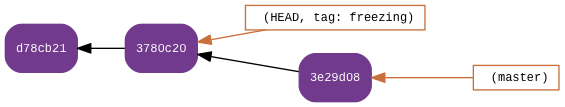

In [17]:
git checkout freezing && gitloggraph

`git checkout`:
1. **moves `HEAD`** to whatever commit or reference you specified (in this case the `freezing` tag that references the second commit)
2. **updates your working tree** with the snapshot of the tree of that commit

We got a big warning about being in 'detached `HEAD`' state. This means that `HEAD` is not pointing to a branch reference, but directly to a commit instead. Usually you don't want this, because it could lead to lost work (more details later), so it's best to start a new branch.

## Let's branch

Switched to a new branch 'heatup'


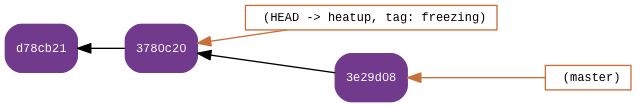

In [18]:
# `checkout -b x` is shorthand for `git branch x && git checkout x`
git checkout -b heatup && gitloggraph

The `git branch branchname` command creates a new branch reference and points it to the commit that `HEAD` is currently (possibly transitively) pointing at. It does *not* update `HEAD` to point to this new branch, so new commits will not actually be 'on' this branch until you check it out, or use the shortcut used here.

We could have prevented the detached `HEAD` with `git checkout -b heatup freezing`, which is equivalent to `git checkout freezing && git branch heatup && git checkout heatup`.

[heatup b28246a] Defreeze
 1 file changed, 1 insertion(+), 1 deletion(-)


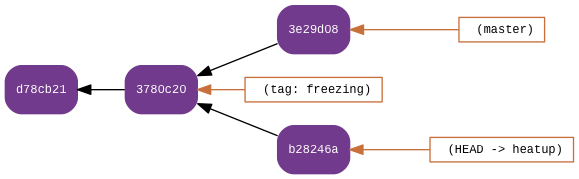

In [19]:
sed -e 's/Cold/Bold/' -i '' foo.txt && git commit -a -m 'Defreeze' && gitloggraph

Note again how `HEAD` and the branch references have been updated.

Here we used the `-a` commit flag, which `add`s all changes before committing. Usually this is bad practice, and you should really add changes separately to make sure each commit contains coherent sets of changes, and not things a bunch of unrelated fixes or unfinished/breaking changes.

## Merging

At some point you will want to bring your changes on a branch into the master branch, or combine the changes from different branches. One way is to 'merge' one branch into the branch you are currently on.

Switched to branch 'master'
Merge made by the 'recursive' strategy.
 foo.txt | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


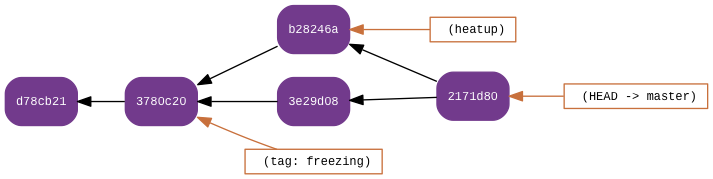

In [20]:
git checkout master
git merge heatup -m "Merging 'heatup' into master" && gitloggraph

As you see, this creates a new commit, a so-called 'merge commit', that has the special property of having multiple parents and combines the directory tree of those parents. In our case each branch touched separate files and we end up with both files at the last stage of each respective branch.

In [21]:
ls && cat foo.txt

bar.txt	foo.txt
Bold Hearts


## Rebasing

HEAD is now at 3e29d08 Tell him again
Switched to branch 'heatup'


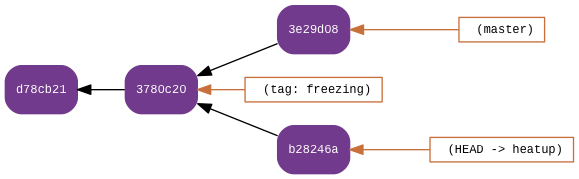

In [22]:
git reset --hard HEAD@{1} && git checkout heatup && gitloggraph

First, rewinding head to replay your work on top of it...
Applying: Defreeze


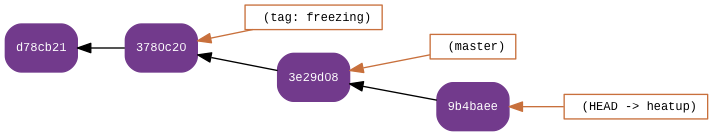

In [23]:
git rebase master && gitloggraph

'Rebasing' can be an **alternative** to merging. It changes the 'base' of the branch you are on, to make it seem like you started this branch at the new base.

The argument to `git rebase` specifies which commit will be your new base, or which commit you want to '**rebase onto**'. It looks like git cut off the branch and put it back on top of `master`.

Note that the **hash** of the last commit has **changed**! The parent of the commit has changed, and as said before the hash changes with any change in a commit's content. To git, this is now _a whole new commit_, unrelated to the original one.

To show the rebasing alternative, we used `reset` to 'rewind' `HEAD` (and the branch it points to, here `master`) back to where it was before the last action, i.e. before the merge. The `--hard` flag really discards all changes. This is the **first example of the power of git's bookkeeping** that allows you to undo nearly anything, which we will dive into deeper later.

In [24]:
# Check the result is indeed the same
ls && cat foo.txt

bar.txt	foo.txt
Bold Hearts


## Merge or Rebase?
Why merge:
- Log shows history as it happened
- List of merge commits are summary (not 1000x 'fixed typo/whitespace'...)

Why rebase:
- Many parallel branches = chaotic DAG
- Conflicts resolved at commit where they happened
- Rewrite history to reflect higher level conceptual steps rather than just code changes

** Per team decision ** but also IMHO ** per branch **

# Remoting

## Distributed
- ** A remote (repository) ** - version of your project somewhere else
- Other directory, on network, GitHub, ...
- Can be any repository (project's central repo, friend's copy, Linux kernel, ...)
- Use to _push_ your changes and _pull_ others

## Adding a remote
Create a 'bookmark' to another repository

In [25]:
cd /tmp && mkdir using-git.clone && cd using-git.clone
git init .

Initialized empty Git repository in /private/tmp/using-git.clone/.git/


In [26]:
git remote add provenance ../using-git
git remote -v && gitloggraph

provenance	../using-git (fetch)
provenance	../using-git (push)
fatal: your current branch 'master' does not have any commits yet


## Fetching
Refresh knowledge about remote

remote: Counting objects: 11, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (11/11), done.
From ../using-git
 * [new branch]      heatup     -> provenance/heatup
 * [new branch]      master     -> provenance/master
 * [new tag]         freezing   -> freezing


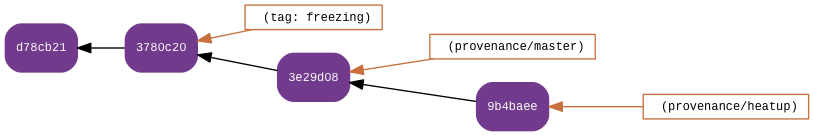

In [27]:
git fetch provenance && gitloggraph

Fetching only downloads all new commits and references from the remote, it doesn't change anything locally.

Note there is no local master or HEAD in the graph. It is there, but it doesn't point to an actual commit yet

## Pushing
Update remote with your changes

Branch master set up to track remote branch master from provenance.
Already on 'master'
[master 707f94a] We're done
 1 file changed, 1 insertion(+)


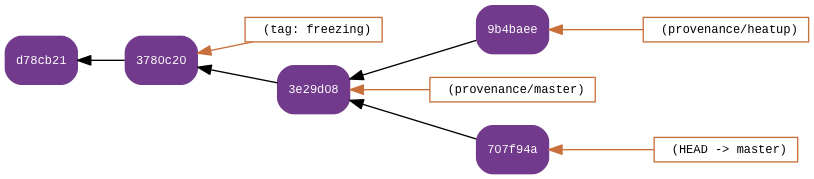

In [28]:
git checkout -b master provenance/master && echo "Done" >> foo.txt && git commit -a -m "We're done"
gitloggraph

## Pushing
Update remote with your changes

Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 293 bytes | 0 bytes/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To ../using-git
   3e29d08..707f94a  master -> master


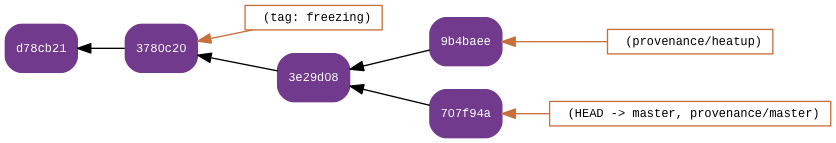

In [29]:
git push provenance && gitloggraph

## Pulling
Update your branch with remote changes

Switched to branch 'master'
[master a009f5a] Continueing
 1 file changed, 1 insertion(+)
remote: Counting objects: 3, done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (3/3), done.
From ../using-git
   707f94a..a009f5a  master     -> provenance/master


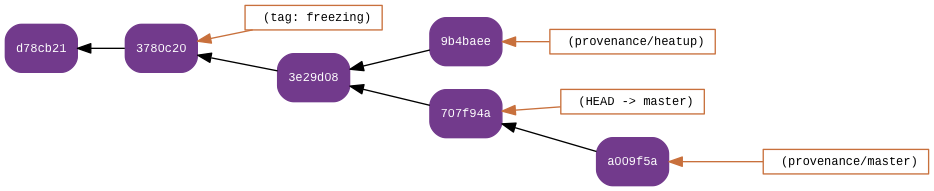

In [30]:
# Make a commit in original repo
cd ../using-git && git checkout master && echo "Not done yet" >> foo.txt && git commit -a -m "Continueing"
# Fetch changes in new repo
cd ../using-git.clone && git fetch && gitloggraph 

## Pulling

Updating 707f94a..a009f5a
Fast-forward
 foo.txt | 1 +
 1 file changed, 1 insertion(+)


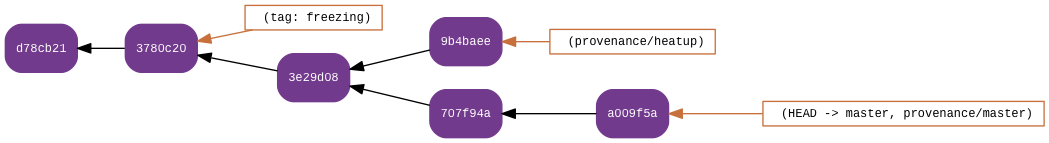

In [31]:
git pull provenance && gitloggraph

Using `git pull` is actually shorthand for fetching and then merging the remote branch into your local branch. Note git told us it fast-forwarded, which means that it merged by just moving the local branch reference to the last commit. It could do that when your branch has not diverged, i.e. your branch's head is an ancestor of the remote branch's head. 

## Cloning
Helping you forget about first steps

Cloning into 'using-git.bestclone'...
done.


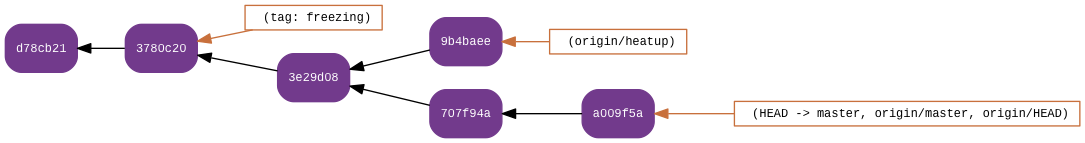

In [32]:
cd .. && git clone using-git using-git.bestclone
cd using-git.bestclone && gitloggraph

And tada, we have the same setup in one quick command. The name `origin` is just the default name for a clone's original remote, it is not special (just like `master` is just the default name for the first branch and is not special).

In this case, `clone` also 

In [33]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


The status is the same as at the remote, except for the mention of `origin/master`. This is the 'tracked' branch, which is automatically set up bu the clone command. More on that later.

When cloning, the clone will place `HEAD` at the same place as the remote has it, and creates the according branch reference locally. Other branches are not created locally, you only see where branch references are at the remote, prefixed with `<remotename>/`.

Note that `origin` is not special, it is just the name used by default when cloning a remote. If you want (to confuse somebody, like your future self) you could pick a different name like `git clone -o daoridz`, or you can name any other remote `origin`.

## Tracking branches
- Tracked branch = remote branch used in pull/push if none given
- Or: 'upstream' branch
- up-to-date/ahead/behind info in `git status`
- Created for you when:
    - **cloning** - `master` tracks `origin/master`
    - **checking out remote branch** - i.e.:<br>`git checkout -b foo remote/foo`<br>, or equivalent:<br>`git checkout --track remote/foo`
- Can track branch with any name

## Tracking by hand

In [34]:
(git checkout origin/heatup && git branch notheatup && git checkout notheatup) &> /dev/null
git branch -vv

  master    a009f5a [origin/master] Continueing
* notheatup 9b4baee Defreeze


In [35]:
git branch -u origin/heatup
git branch -vv

Branch notheatup set up to track remote branch heatup from origin.
  master    a009f5a [origin/master] Continueing
* notheatup 9b4baee [origin/heatup] Defreeze


Setting the upstream branch to track can also be done when pulling or pushing by adding the `-u` flag. A very common usecase is for instance to create a branch locally, make some commits, then push it up with `-u` to track the remote branch you just uploaded.

# Undoing


## Oops...

> I won't commit/branch/push, I'm afraid I will break something
>     - Git novice

Reality: ***very*** hard to completely screw up

## Git never forgets&dagger;

- **Git never overwrites** - rewriting history (rebasing, appending commits, etc) creates new, independent commits
- **Git doesn't delete&dagger; ** - old commits are there, but just not visible when unreachable

*Reachability*: a commit is *reachable* when there is a directed path from a branch reference to that commit

## Finding lost commits

In [36]:
cd ../using-git && git fsck --lost-found | tee fsck.out

Checking object directories: 100% (256/256), done.
dangling commit 2171d80c789198a6a849dcadbaef3b0ce08b1e64


In [37]:
# Show content of dangling commit
grep dangling < fsck.out | cut -d ' ' -f 3 | tee lost-commit | xargs git cat-file -p

tree 5a2aaa3fe1272654c3cb392187b2bb79b9b21159
parent 3e29d084e634ef9e163489e5455f58330aca1b4f
parent b28246ab4d1e95d7968b56e055709469aa03ec4c
author Sander van Dijk <sgvandijk@gmail.com> 1475671236 +0100
committer Sander van Dijk <sgvandijk@gmail.com> 1475671236 +0100

Merging 'heatup' into master


## Recover!

Switched to a new branch 'return-of-the-merge'


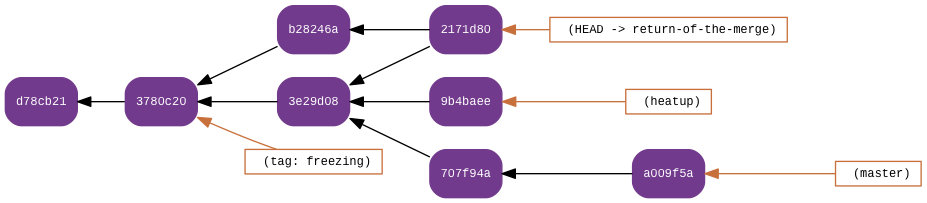

In [38]:
git checkout -b return-of-the-merge $(cat lost-commit) && gitloggraph

This shows the commit is there. Remember that the commit referenced by `heatup` was the result of rebasing rather than merging. This shows again that commits with the same contents but different ancestors are regarded as completely separate.

## The reflog
Keeps track of all the commits a reference pointed at.

In [39]:
git reflog

2171d80 HEAD@{0}: checkout: moving from master to return-of-the-merge
a009f5a HEAD@{1}: commit: Continueing
707f94a HEAD@{2}: checkout: moving from heatup to master
9b4baee HEAD@{3}: rebase finished: returning to refs/heads/heatup
9b4baee HEAD@{4}: rebase: Defreeze
3e29d08 HEAD@{5}: rebase: checkout master
b28246a HEAD@{6}: checkout: moving from master to heatup
3e29d08 HEAD@{7}: reset: moving to HEAD@{1}
2171d80 HEAD@{8}: merge heatup: Merge made by the 'recursive' strategy.
3e29d08 HEAD@{9}: checkout: moving from heatup to master
b28246a HEAD@{10}: commit: Defreeze
3780c20 HEAD@{11}: checkout: moving from 3780c20648b21434154d7c8ec1203f04e4f04a03 to heatup
3780c20 HEAD@{12}: checkout: moving from master to freezing
3e29d08 HEAD@{13}: commit: Tell him again
3780c20 HEAD@{14}: commit: Cool down
d78cb21 HEAD@{15}: commit (initial): My first commit!


We also could have found the dangling commit in this log: it is the one before the reset, at `HEAD@{8}`; you can see the hash is the same as the top one, where `HEAD` is currently. You can use the `HEAD@` references as handy shortcuts to check out old commits.

By default the log is for the `HEAD` reference, but you can request the log for any other reference, too.

If you want to reset the current branch you are on, you can use `git reset --hard HEAD@{x}` as shown earlier when we undid the merge.

In [40]:
git reflog heatup

9b4baee heatup@{0}: rebase finished: refs/heads/heatup onto 3e29d084e634ef9e163489e5455f58330aca1b4f
b28246a heatup@{1}: commit: Defreeze
3780c20 heatup@{2}: branch: Created from HEAD


## More undoing
- Working changes
- Staging
- Amending commits

Although amending is not really undoing, but rather rewriting history

But first, tips to make recovery easier:
- **Branch soon and often** - branches are easy to discard
- **Commit often** - can always reorder/squash/discard small changes
- **Communicate** about public branches

## Undoing working changes

In [41]:
echo "mistake 1" >> foo.txt && echo "mistake 2" >> bar.txt && git status -s -uno

 M bar.txt
 M foo.txt


The `-s` flag gives a short version of the status, `-uno` stands for 'no untracked files'

In [42]:
# Discard changes to single file
git checkout foo.txt && git status -s -uno

 M bar.txt


`git checkout` with a path reset the contents of the file at that path with the contents of the index, i.e. having the changes you've `add`ed, but without other changes you have made. In the case when you haven't added anything, like here, it reverts it to the state of the commit you're on.

In [43]:
# Discard all changes
git reset --hard && git status -uno

HEAD is now at 2171d80 Merging 'heatup' into master
On branch return-of-the-merge
nothing to commit (use -u to show untracked files)


Note that a hard reset also discards any changes added to the index

## Undoing staging

In [44]:
echo "mistake 3" >> foo.txt && git add foo.txt && git status -s -uno

M  foo.txt


In [45]:
git reset foo.txt

Unstaged changes after reset:
M	foo.txt


Without a path, all files get reset. This is equivalent to using the `--mixed` flag; compare with `--hard` where not only the index but also your working copy gets reset. The last alternative is to use `--soft`, which keeps both the index and the working copy intact, but resets `HEAD` to a given commit.

## Amending commits

In [46]:
echo "mistake 3" >> foo.txt && echo "mistake 4" >> bar.txt && git add foo.txt && git commit -m "adding mistake 4"

[return-of-the-merge aa7edd4] adding mistake 4
 1 file changed, 2 insertions(+)


In [47]:
# Amending commit message
git commit --amend -m "adding mistake 3"

[return-of-the-merge cf1e631] adding mistake 3
 Date: Wed Oct 5 13:40:41 2016 +0100
 1 file changed, 2 insertions(+)


In [48]:
# adding more changes
git add bar.txt && git commit --amend -m "adding mistakes 3 and 4"

[return-of-the-merge c677bae] adding mistakes 3 and 4
 Date: Wed Oct 5 13:40:41 2016 +0100
 2 files changed, 3 insertions(+)


To remove changes from the commit, you can reset to the previous commit while keeping your working copy (`git reset HEAD~`) and make a new commit from there.

## Revert commits
Create a new commit that does the inverse of another

In [49]:
git revert --no-edit HEAD

[return-of-the-merge 01759a1] Revert "adding mistakes 3 and 4"
 2 files changed, 3 deletions(-)


In [50]:
git log --oneline

01759a1 Revert "adding mistakes 3 and 4"
c677bae adding mistakes 3 and 4
2171d80 Merging 'heatup' into master
3e29d08 Tell him again
b28246a Defreeze
3780c20 Cool down
d78cb21 My first commit!


In [51]:
git diff HEAD~2

Why not reset?
- Can revert any commit, not just last
- Revert already published commits

## &dagger; When Git forgets
When you tell it to:
- Garbage collect: `git gc`
- Reset unstaged/uncommitted data